<a href="https://colab.research.google.com/github/satanjj10/DL_course/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170508288/170498071 [==============================] - 13s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

答案是: airplane


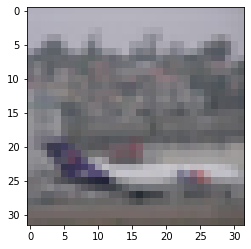

In [6]:
import matplotlib.pyplot as plt
idx = 30000
print("答案是:", trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
layers = [
    # 1 filter(3 * 3 * 3(previous depth)) * 64 + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1 filter(3 * 3 * 64(previous depth)) * 128 + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    # 頭重腳輕(卷積重，MLP輕)(4096 * 10 + 10 = 40970)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 256)       

In [10]:
# GAP: 進MLP後做平均
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten
layers = [
    # 1 filter(3 * 3 * 3(previous depth)) * 64 + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1 filter(3 * 3 * 64(previous depth)) * 128 + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    # 進MLP後做平均
    GlobalAveragePooling2D(),
    # 頭重腳輕(卷積重，MLP輕)(256 * 10 + 10 = 2570)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 256)       

In [11]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [12]:
# 把圖片轉成0，1
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [ ]:
# batch_size: 你看多少筆再進行一次梯度下降(5[圖片大/訓練資料少]-200[圖片小/訓練資料多])
# epochs: 全體資料(60000) 你要看幾輪(我們什麼時候要停的關鍵)
# validation_split: 測試什麼時候停下來要用沒看過的資料(val loss穩定的時候就停, 不要過擬合)
# (60000 * 0.9) / 200 -> 270
# verbose: 0(quiet) 1(full) 2(no progress bar)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
225/225 - 15s - loss: 1.8294 - accuracy: 0.3204 - val_loss: 1.5735 - val_accuracy: 0.4160 - 15s/epoch - 68ms/step
Epoch 2/50
225/225 - 3s - loss: 1.5200 - accuracy: 0.4472 - val_loss: 1.4241 - val_accuracy: 0.4810 - 3s/epoch - 15ms/step
Epoch 3/50
225/225 - 4s - loss: 1.3773 - accuracy: 0.5058 - val_loss: 1.3232 - val_accuracy: 0.5106 - 4s/epoch - 16ms/step
Epoch 4/50
225/225 - 4s - loss: 1.2755 - accuracy: 0.5433 - val_loss: 1.2440 - val_accuracy: 0.5522 - 4s/epoch - 16ms/step
Epoch 5/50
225/225 - 4s - loss: 1.1983 - accuracy: 0.5757 - val_loss: 1.1540 - val_accuracy: 0.5906 - 4s/epoch - 16ms/step
Epoch 6/50
225/225 - 4s - loss: 1.1333 - accuracy: 0.6029 - val_loss: 1.1051 - val_accuracy: 0.6200 - 4s/epoch - 16ms/step
Epoch 7/50
225/225 - 3s - loss: 1.0852 - accuracy: 0.6193 - val_loss: 1.0480 - val_accuracy: 0.6432 - 3s/epoch - 15ms/step
Epoch 8/50
225/225 - 4s - loss: 1.0307 - accuracy: 0.6364 - val_loss: 1.0271 - val_accuracy: 0.6402 - 4s/epoch - 16ms/step
Epoch 9/50
225